In [1]:
import pandas as pd
import numpy as np

### Load Data

In [10]:
data = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv"

In [12]:
!wget $data

--2024-09-17 16:24:52--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.41M  1.67MB/s    in 0.8s    

2024-09-17 16:24:54 (1.67 MB/s) - ‘data.csv’ saved [1475504/1475504]



In [2]:
df = pd.read_csv('data.csv')


In [3]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df.columns = df.columns.str.lower().str.replace(" ","_")

In [5]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
strings = list(df.dtypes[df.dtypes == object].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [7]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(" ","_")

In [8]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


### Exploratory Data Analysis


##### Unique Values in The Dataset

In [9]:
for i in df.columns:
    print(i)
    print(df[i].unique()[:5])
    print(df[i].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

##### Distribution of Price

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

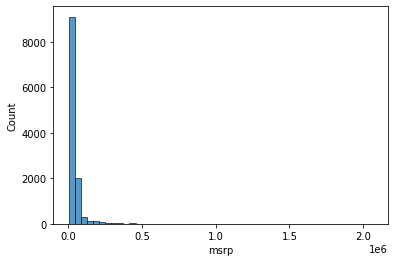

In [11]:
sns.histplot(df.msrp, bins = 50);

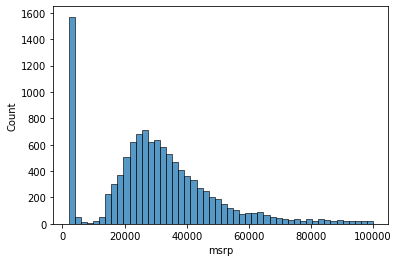

In [12]:
sns.histplot(df.msrp[df.msrp < 100000], bins = 50);

In [13]:
price_logs = np.log1p(df.msrp)

##### Normalize the values of price using logarithmic function to get rid of the long tailed distribution

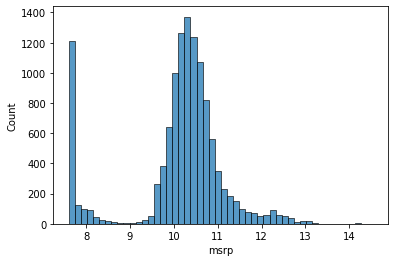

In [14]:
sns.histplot(price_logs, bins = 50);

##### Missing values

In [15]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

##### Setting Validation Framework

In [16]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [17]:
n_train,n_test,n_val

(7150, 2382, 2382)

In [18]:
#subset dataset
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train + n_test]
df_test = df.iloc[n_val + n_train:]


In [19]:
len(df_val),len(df_test),len(df_train)

(2382, 2382, 7150)

In [20]:
#shuffle the dataset
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)

In [21]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_val + n_train:]]

In [22]:
df_train = df_train.reset_index(drop=True)

In [23]:
df_val = df_val.reset_index(drop=True)
df_val = df_test.reset_index(drop=True)

In [24]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [25]:
del df_train['msrp']
del df_test['msrp']
del df_val['msrp']

In [26]:
len(y_train), len(df_train)

(7150, 7150)

#### Linear Regression

In [27]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [56]:
xi = [453,11,86]

In [57]:
w0 = 7.17
w = [0.01,0.04,0.002]

In [58]:
def linear_regression(xi):
    n = len(xi)
    pred = w0

    for j in range(n):
        pred = pred + w[j] * xi[j]
        
    return (pred)

In [59]:
prediction = linear_regression(xi)

In [60]:
np.expm1(prediction)

222347.2221101062

### Linear Regression Vector Form


In [61]:
def dot(xi, w):
    n = len(xi)

    res = 0.0 

    for j in range(n):
        res = res + xi[j] * w[j]
    
    return res

In [62]:
w_new = [w0] + w

In [63]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [64]:
def linear_regression(xi): 
    xi = [1] + xi      
    return dot(xi,w_new)

In [65]:
linear_regression(xi)

12.312

In [66]:
np.expm1(12.312)

222347.2221101062

In [67]:
xi = [453,11,86]
w0 = 7.17
w = [0.01,0.04,0.002]

In [68]:
x1 = [1,148,24,1385]
x2 = [1,132,25,2031]
x10 = [1,453,11,86]

In [69]:
X = [x1,x2,x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [70]:
X.dot(w_new)

array([12.38 , 13.552, 12.312])

In [71]:
def linear_regression(X):
    return X.dot(w_new)

### Training Linear Regression Model

In [72]:
def train_linear_regression(X,y):
    pass

In [73]:
X = [
    [148,24,1385],
    [132,25,2031],
    [453,11,86],
    [158,24,185],
    [172,25,201],
    [413,11,86],
    [38,54,185],
    [142,25,431],
    [453,31,86],
]


X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [74]:
ones = np.ones(X.shape[0])

In [75]:
X = np.column_stack([ones,X]).round()

In [76]:
y = [1000,2000,1500,2500,1000,2000,1500,2500,1200]

In [77]:
XTX = X.T.dot(X)

In [78]:
XTX_inv = np.linalg.inv(XTX)

In [79]:
w_full = XTX_inv.dot(X.T).dot(y)

In [80]:
w0 = w_full[0]
w = w_full[1:]

In [81]:
w0, w

(3000.677669255562, array([ -2.27742529, -25.76941296,  -0.23012064]))

In [82]:
def train_linear_regression(X,y):
    
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X]).round()

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0],w_full[1:]


In [83]:
train_linear_regression(X,y)

LinAlgError: Singular matrix

#### Baseline Model for Predicting Car Price

In [84]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [85]:
base = ['engine_hp','engine_cylinders','highway_mpg', 'city_mpg', 'popularity']

In [86]:
df_train[base].fillna(0)

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657
...,...,...,...,...,...
7145,300.0,6.0,31,20,3916
7146,210.0,4.0,30,24,873
7147,285.0,6.0,22,17,549
7148,563.0,12.0,21,13,86


In [87]:
X_train = df_train[base].fillna(0).values

In [88]:
w0,w = train_linear_regression(X_train,y_train)

In [89]:
y_pred = w0 + X_train.dot(w)

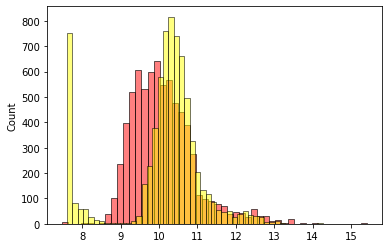

In [90]:
sns.histplot(y_pred, color="red", alpha=0.5, bins = 50)
sns.histplot(y_train, color = "yellow", alpha=0.5,bins = 50);

#### Root Mean Squared Error

In [91]:
def rmse(y,y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [92]:
rmse(y_train,y_pred)

0.7554192603920132

#### Model Validation

In [93]:
def prepare_x(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [94]:
X_train = prepare_x(df_train)
w0,w = train_linear_regression(X_train,y_train)

X_val = prepare_x(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val,y_pred)

0.7359130757318741

#### Feature Engineering

In [97]:
def prepare_x(df):
    df = df.copy()
    
    df['age'] = 2017 - df.year
    features = base + ['age']

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [98]:
X_train = prepare_x(df_train)

In [100]:
X_train = prepare_x(df_train)
w0,w = train_linear_regression(X_train,y_train)

X_val = prepare_x(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val,y_pred)

0.5149229218585306

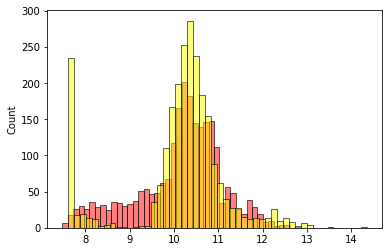

In [101]:
sns.histplot(y_pred, color="red", alpha=0.5, bins = 50)
sns.histplot(y_val, color = "yellow", alpha=0.5,bins = 50);

**Categorical Variables** 
Implementing one-hot encoding


In [110]:
def prepare_x(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2,3,4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%s' % v)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [112]:
X_train = prepare_x(df_train)
w0,w = train_linear_regression(X_train,y_train)

X_val = prepare_x(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val,y_pred)

0.5133819172832684

In [128]:
makes = list(df.make.value_counts().head().index)

In [131]:
def prepare_x(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2,3,4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%s' % v)

    for v in makes:
        df['make_%s' % v] = (df.make == v).astype(int)
        features.append('make_%s' % v)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [132]:
X_train = prepare_x(df_train)
w0,w = train_linear_regression(X_train,y_train)

X_val = prepare_x(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val,y_pred)

0.5050722255722704

In [178]:
categorical_variables = list(df.dtypes[df.dtypes == 'object'].index)
categorical_variables.pop(3)
categorical_variables

['make',
 'model',
 'engine_fuel_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [179]:
categories = {}

for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)

In [180]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'model': ['silverado_1500',
  'tundra',
  'f-150',
  'sierra_1500',
  'beetle_convertible'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [181]:
def prepare_x(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2,3,4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%s' % v)

    for c,values in categories.items():
        for v in values:
            df['%s_%s' % (c,v)] = (df[c] == v).astype(int)
            features.append('%s_%s' % (c,v))

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [182]:
X_train = prepare_x(df_train)
w0,w = train_linear_regression(X_train,y_train)

X_val = prepare_x(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val,y_pred)

123.73686862808826

#### Regularization

In [183]:
def train_linear_regression_reg(X,y,r = 0.01):
    
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X]).round()

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0],w_full[1:]

In [184]:
X_train = prepare_x(df_train)
w0,w = train_linear_regression_reg(X_train,y_train, r=0.01)

X_val = prepare_x(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val,y_pred)

0.4603308393652442

#### Tuning the model

In [185]:
for r in [0.0,0.00001,0.0001,0.001,0.1,1,10]:

    X_train = prepare_x(df_train)
    w0,w = train_linear_regression_reg(X_train,y_train, r=0.01)

    X_val = prepare_x(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val,y_pred)

    print(r,w0,score)

0.0 7.0924658920220285 0.4603308393652442
1e-05 7.0924658920220285 0.4603308393652442
0.0001 7.0924658920220285 0.4603308393652442
0.001 7.0924658920220285 0.4603308393652442
0.1 7.0924658920220285 0.4603308393652442
1 7.0924658920220285 0.4603308393652442
10 7.0924658920220285 0.4603308393652442


In [186]:
r = 0.001 
X_train = prepare_x(df_train)
w0,w = train_linear_regression_reg(X_train,y_train, r=0.01)

X_val = prepare_x(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val,y_pred)

score

0.4603308393652442

#### Using the model

In [187]:
full_train = pd.concat([df_train,df_val])

In [188]:
df_full_train = full_train.reset_index(drop=True)

In [189]:
X_full_train = prepare_x(df_full_train)

In [190]:
y_full_train = np.concatenate([y_train,y_val])

In [191]:
w0,w = train_linear_regression_reg(X_full_train,y_full_train, r=0.01)


In [192]:

X_test = prepare_x(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test,y_pred)

score

0.4584126297888597

In [199]:
car = df_test.iloc[20].to_dict()

In [200]:
df_small = pd.DataFrame([car])

In [201]:
X_small = prepare_x(df_small)

In [202]:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

10.561217586693727

In [203]:
np.expm1(y_pred)

38607.108057337944

In [204]:
np.expm1(y_test[20])

35000.00000000001